In [1]:
import tensorflow as tf
import os

In [2]:
# limiting the tensorflow gpu memory usage (to resolve OOM error)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import  imghdr

In [4]:
data_dir = 'data'
img_exts = ['jpeg','jpg','bmp','png']

In [5]:
os.listdir(os.path.join(data_dir, "happy"))

['images26.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 '05-12-21-happy-people.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 'physed-happiness-facebookJumbo.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images31.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'habits-that-define-very-happy-people.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 '1902587.jpg',
 'o-HAPPY-facebook.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 'happy-people-13772392.jpg',
 'images30.jpg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'maxresdefault2.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'happy-people-1024x768.jpeg',
 '1902540.jpg',
 'hqdefault.jpg',
 'image19.jpeg',
 'images36.jpg',
 'images22.jpg',
 'tmp_6mv7xy_5d5b15258a50

In [6]:
print(len(os.listdir(os.path.join(data_dir, "happy"))))
print(len(os.listdir(os.path.join(data_dir, "sad"))))

101
69


In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
.DS_Store
sad


In [8]:
for image_class in os.listdir(data_dir):
    if image_class==".DS_Store":
        pass
    else:
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                # reading the image file
                img = cv2.imread(image_path)

                #getting the image extensrion
                tip = imghdr.what(image_path)

                #cheching if it exists
                if tip not in img_exts:
                    print("Image not in extensions list {}".format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print("Issue with the image file {}".format(image_path))


In [9]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
# loading the dataset using Dataset 
data = tf.keras.utils.image_dataset_from_directory('data')


Found 170 files belonging to 2 classes.


2024-09-03 11:49:41.685687: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-03 11:49:41.685713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-03 11:49:41.685717: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-03 11:49:41.685735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-03 11:49:41.685749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator = data.as_numpy_iterator()


In [15]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x36634c4c0>)

In [16]:
batch = data_iterator.next()

In [17]:
batch

(array([[[[2.45000000e+02, 2.32093750e+02, 1.57196289e+02],
          [2.45000000e+02, 2.32291992e+02, 1.56645996e+02],
          [2.43501465e+02, 2.37438965e+02, 1.77376465e+02],
          ...,
          [2.22421875e+02, 1.40721680e+02, 4.34047852e+01],
          [2.27833008e+02, 1.63135254e+02, 6.16616211e+01],
          [2.26546875e+02, 1.59543457e+02, 5.68178711e+01]],
 
         [[2.44718750e+02, 2.31640625e+02, 1.49281250e+02],
          [2.45420898e+02, 2.31937988e+02, 1.52140625e+02],
          [2.45031250e+02, 2.37968750e+02, 1.82928711e+02],
          ...,
          [2.26348145e+02, 1.57596191e+02, 5.73325195e+01],
          [2.31781738e+02, 1.81046387e+02, 9.29687500e+01],
          [2.32484375e+02, 1.84614258e+02, 9.50986328e+01]],
 
         [[2.45000000e+02, 2.31000000e+02, 1.42734375e+02],
          [2.42691895e+02, 2.30895020e+02, 1.41379395e+02],
          [2.47000000e+02, 2.37000000e+02, 1.76045898e+02],
          ...,
          [2.27703125e+02, 1.59671875e+02, 6.0609

In [18]:
print(f"the batch length is :{len(batch)}")
print(f"no of elenment in a batch {len(batch[0])}")
print(f"the shape of each image is {batch[0].shape}")

the batch length is :2
no of elenment in a batch 32
the shape of each image is (32, 256, 256, 3)


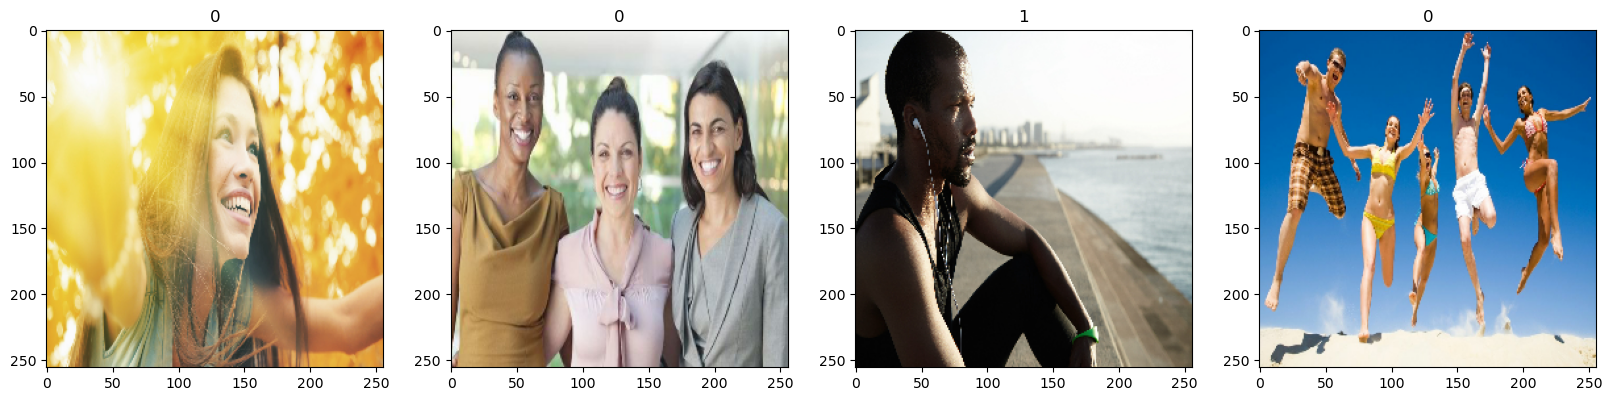

In [19]:
# class 1 = sad
# class 0 = happy
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 data preprocessing

In [20]:
data = data.map(lambda x,y:(x/255,y))


In [21]:
scaled_iterator = data.as_numpy_iterator()


In [22]:
batch = scaled_iterator.next()

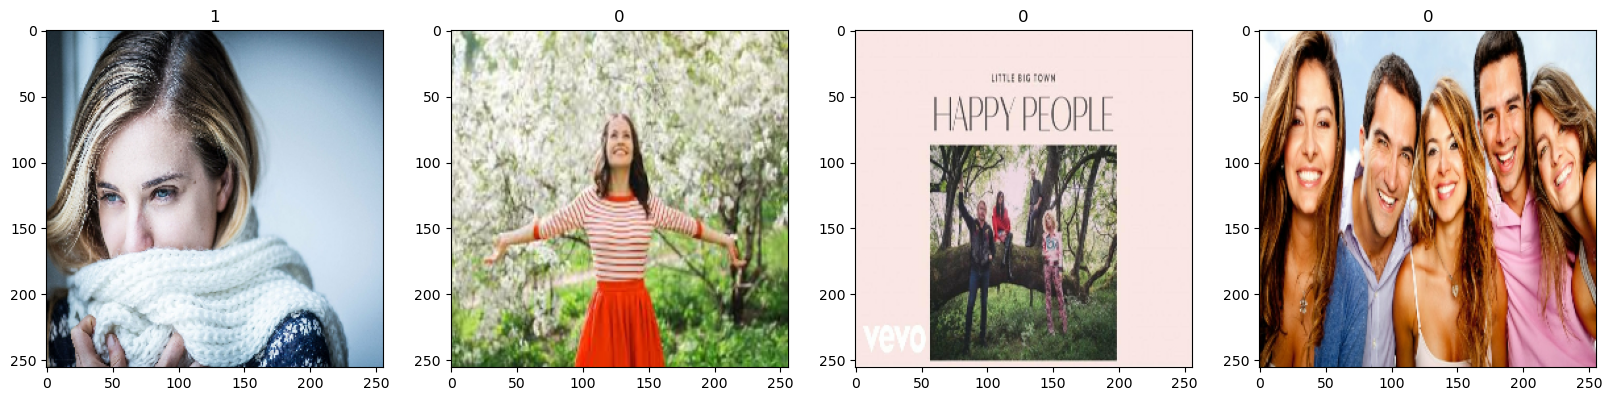

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2)spliting the dataset

In [24]:
print(f"the total number of batches {len(data)}")

the total number of batches 6


In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(f"train_size : {train_size}")
print(f"val_size : {val_size}")
print(f"test_size : {test_size}")


train_size : 4
val_size : 1
test_size : 1


In [26]:
train = data.take(train_size)
val = data.take(val_size)
test = data.take(test_size)
print(f"train size : {len(train)}")
print(f"val size : {len(val)}")
print(f"test size : {len(test)}")

train size : 4
val size : 1
test size : 1


# 3) building the model

# 3.1) model building

In [27]:
#importing the dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf

In [28]:
model = Sequential()


#adding the layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 3.2) model traning

In [31]:
log_dir = 'logs'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [32]:
# model traing
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])


Epoch 1/20


2024-09-03 11:50:18.944884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.3854 - loss: 1.8370 - val_accuracy: 0.5938 - val_loss: 0.7669
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.3802 - loss: 0.9228 - val_accuracy: 0.5938 - val_loss: 0.6707
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.6677 - loss: 0.6436 - val_accuracy: 0.5938 - val_loss: 0.6024
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.5583 - loss: 0.6082 - val_accuracy: 0.6875 - val_loss: 0.6160
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.7448 - loss: 0.5619 - val_accuracy: 0.7500 - val_loss: 0.4595
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.7354 - loss: 0.4895 - val_accuracy: 0.6562 - val_loss: 0.6054
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.6344 - loss: 0.6031 - val_accuracy: 0.8125 - val_loss: 0.5020
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.7469 - loss: 0.5313 - val_accuracy: 0.8438 - val_loss: 0.4716
Epo

In [34]:
hist.history

{'accuracy': [0.4453125,
  0.3984375,
  0.6640625,
  0.5625,
  0.75,
  0.71875,
  0.6484375,
  0.765625,
  0.8125,
  0.828125,
  0.78125,
  0.8359375,
  0.8515625,
  0.890625,
  0.890625,
  0.9375,
  0.8984375,
  0.96875,
  0.9609375,
  0.9765625],
 'loss': [1.8972883224487305,
  0.8599715828895569,
  0.6329894661903381,
  0.6042859554290771,
  0.5503575801849365,
  0.503324031829834,
  0.5612792372703552,
  0.5349347591400146,
  0.45229458808898926,
  0.42726200819015503,
  0.4047735631465912,
  0.38212743401527405,
  0.3544647991657257,
  0.32956504821777344,
  0.2835179567337036,
  0.22463232278823853,
  0.23615731298923492,
  0.15361343324184418,
  0.12627670168876648,
  0.09877865016460419],
 'val_accuracy': [0.59375,
  0.59375,
  0.59375,
  0.6875,
  0.75,
  0.65625,
  0.8125,
  0.84375,
  0.875,
  0.90625,
  0.875,
  0.8125,
  0.84375,
  0.875,
  0.9375,
  0.90625,
  1.0,
  0.9375,
  0.96875,
  0.96875],
 'val_loss': [0.7669229507446289,
  0.6707131862640381,
  0.60239577293396,

# 3.3) performace plot

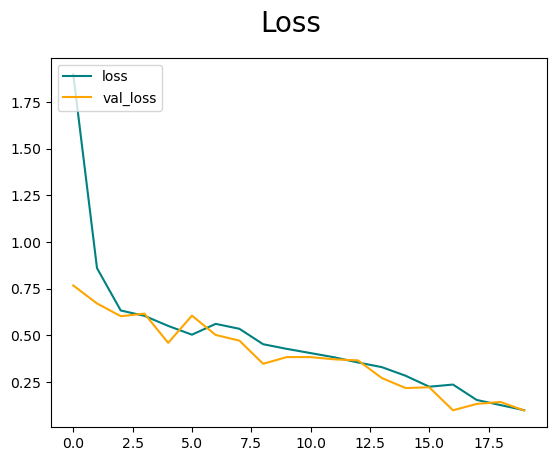

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()